Démarrez par la génération de cinq groupes de 100 vecteurs chacun dans l’espace 3D, chacun suivant une loi normale (de moyenne nulle et de variance unitaire). Appliquez à chaque groupe une translation différente dans l’espace, générez les étiquettes de groupe, construisez l’ensemble total de données et mélangez ensuite les lignes de cet ensemble 

In [6]:
import numpy as np    
from sklearn.utils import shuffle

# génération 100 points 3D suivant loi normale centrée
# chaque groupe est translaté d'un vecteur [3,3,3]
d1 = np.random.randn(100,3) + [3,3,3]
d2 = np.random.randn(100,3) + [-3,-3,-3]
d3 = np.random.randn(100,3) + [-3,3,3]
d4 = np.random.randn(100,3) + [-3,-3,3]
d5 = np.random.randn(100,3) + [3,3,-3]
print(d1.shape)

(100, 3)


In [9]:
# génération des étiquettes de chaque groupe --> vecteur (100,1)
c1 = np.ones(100)
c2 = 2 * np.ones(100)
c3 = 3 * np.ones(100)
c4 = 4 * np.ones(100)
c5 = 5 * np.ones(100)

print(c1.shape)

(100,)


In [22]:
# concaténation des données dans une matrice
data = np.concatenate((d1,d2,d3,d4,d5))
labels = np.concatenate((c1, c2, c3, c4, c5))
print(data.shape)
# permutation aléatoire des lignes de la matrice data
data, labels = shuffle(data, labels)

(500, 3)


In [25]:
data[:,:].shape

(500, 3)

Visualisez les groupes de départ :

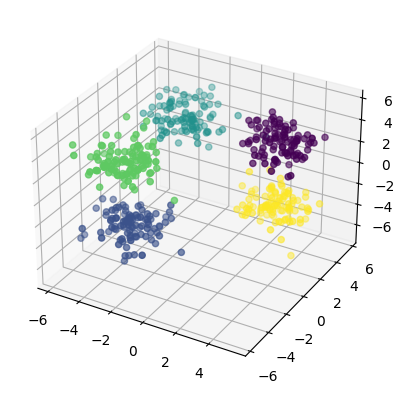

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# La couleur des points dépend de leur étiquette (label)
ax.scatter(data[:,0], data[:,1], data[:,2], c=labels)
plt.show()

Appliquez la classification automatique avec K-means, d’abord avec un seul essai (une seule initialisation suivie d’une seule exécution de K-means, n_init = 1) utilisant la méthode d’initialisation k-means++ :

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=1, init='k-means++').fit(data)

Examinez les paramètres, les attributs et les méthodes de la classe sklearn.cluster.KMeans en suivant le lien indiqué plus haut.

On peut obtenir les groupes prédits pour les données à l’aide de la méthode predict(X) :

In [17]:
pred = kmeans.predict(data)

Les groupes associés aux exemples d’apprentissage sont également stockés dans l’attribut kmeans.labels_ :

In [18]:
print(kmeans.labels_)

[1 1 2 2 0 1 3 3 4 3 1 3 4 0 2 1 0 3 4 4 1 1 2 3 1 1 2 2 1 1 3 2 3 3 1 3 4
 3 0 2 2 3 3 3 1 2 3 0 1 1 2 0 2 2 1 1 3 0 4 2 1 3 1 2 0 0 4 1 0 3 0 0 3 0
 0 2 1 1 4 0 4 2 2 4 3 4 1 3 3 4 3 0 0 4 1 3 1 4 0 1 0 4 0 0 3 2 4 3 2 2 2
 4 1 3 1 3 4 2 1 1 3 4 3 4 4 3 3 4 1 4 4 2 4 2 2 1 4 1 2 0 2 3 2 1 3 1 1 2
 3 4 4 0 3 2 1 2 0 0 1 4 3 3 2 4 3 4 0 0 2 4 4 3 4 4 2 3 4 3 2 1 0 4 1 4 0
 0 4 0 0 4 0 4 1 0 2 2 4 1 0 1 2 4 0 1 0 4 1 3 2 3 4 4 1 2 1 2 2 4 3 2 1 4
 3 2 4 1 0 4 0 2 4 4 4 3 0 0 0 3 1 3 3 4 2 3 0 0 3 2 2 0 0 2 4 1 0 2 1 1 0
 2 3 2 3 1 3 4 3 4 1 0 3 1 3 4 1 0 4 1 4 3 4 2 3 2 1 2 2 4 3 2 1 0 3 1 2 2
 3 3 4 0 2 0 4 4 1 4 4 2 2 0 1 4 0 2 0 0 3 2 3 4 0 2 3 2 1 1 1 0 4 2 1 1 0
 0 4 1 1 3 0 2 4 3 2 1 4 3 3 0 3 1 4 2 1 2 4 2 3 2 0 4 3 4 1 4 1 1 3 1 4 0
 3 1 2 0 1 0 1 2 2 0 3 0 4 0 4 1 0 2 0 1 1 1 0 3 3 0 2 1 4 4 1 3 3 0 0 3 1
 0 2 2 1 3 3 0 0 0 0 2 1 2 1 3 3 4 0 0 0 4 0 2 1 2 1 4 3 2 3 3 1 0 0 2 1 2
 2 4 0 0 1 0 3 3 2 4 0 4 2 4 3 2 0 3 1 2 1 2 4 0 2 1 2 3 2 2 4 4 2 0 3 3 4
 3 0 4 2 0 3 0 1 3 1 4 0 

Visualisez les résultats de cette classification :

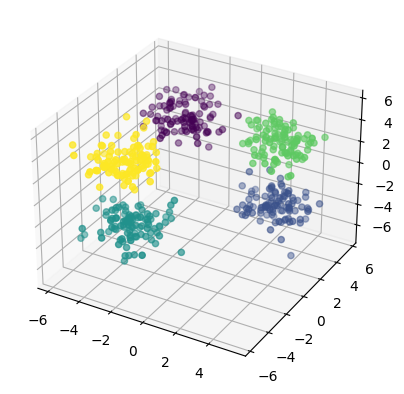

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=pred)
plt.show()

Il est possible d’évaluer la cohérence entre les groupes de départ et le partitionnement trouvé par K-means en utilisant l’indice de Rand ajusté (voir le cours et la documentation) :

In [20]:
from sklearn import metrics
metrics.adjusted_rand_score(pred, labels)

0.9899699009151338

L’appel à metrics.adjusted_rand_score() compare le partitionnement obtenu par la classification automatique (étiquettes de groupe de pred) avec le partitionnement correspondant aux groupes définis au départ (étiquettes stockées dans labels).

Appliquez maintenant la classification automatique avec K-means avec un seul essai (n_init = 1) utilisant la méthode d’initialisation random :

In [21]:
kmeans = KMeans(n_clusters=5, n_init=1, init='random').fit(data)
metrics.adjusted_rand_score(kmeans.labels_, labels)

0.71039260201372